In [4]:
!pip install textblob

     -------------------------------------- 636.8/636.8 kB 1.5 MB/s eta 0:00:00


In [5]:
!pip install wordcloud

     ------------------------------------ 153.3/153.3 kB 760.9 kB/s eta 0:00:00


In [7]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [9]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | We were traveling as a fami...
1,✅ Trip Verified | Flight at 8.40am from DUB to...
2,✅ Trip Verified | Terrible. I have traveled t...
3,✅ Trip Verified | The customer service is ugl...
4,✅ Trip Verified | Most uncomfortable flight I...


In [10]:
df.to_csv("BA_reviews.csv")

In [11]:
import pandas as pd

csv_path = "BA_reviews.csv"
df1 = pd.read_csv(csv_path)
df1.reset_index(drop=True, inplace=True)

print(df1['reviews'])

0      ✅ Trip Verified |  We were traveling as a fami...
1      ✅ Trip Verified | Flight at 8.40am from DUB to...
2      ✅ Trip Verified |  Terrible. I have traveled t...
3      ✅ Trip Verified |  The customer service is ugl...
4      ✅ Trip Verified |  Most uncomfortable flight I...
                             ...                        
995    ✅ Trip Verified |  Istanbul to London Heathrow...
996    ✅ Trip Verified |  Bad service and attitude al...
997    ✅ Trip Verified |  London to Santiago de Chile...
998    ✅ Trip Verified |  Flew a now ageing B777 flig...
999    ✅ Trip Verified | Flew London Gatwick to Tiran...
Name: reviews, Length: 1000, dtype: object


In [12]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [13]:
df1['reviews'] = df1['reviews'].str.strip()
df1['reviews']=df1['reviews'].str.lstrip('✅ Trip Verified |')
df1['reviews']=df1['reviews'].str.lstrip('Not Verified |')
df1['reviews']= df1['reviews'].str.lower()
print(df1)

     Unnamed: 0                                            reviews
0             0  we were traveling as a family (5 people). beca...
1             1  flight at 8.40am from dub to lcy cancelled 115...
2             2  ble. i have traveled twice with them this year...
3             3  he customer service is ugly. tried calling two...
4             4  most uncomfortable flight i have ever experien...
..          ...                                                ...
995         995  istanbul to london heathrow. the plane itself ...
996         996  bad service and attitude all round. my fiasco ...
997         997  london to santiago de chile. i was flying prem...
998         998  flew a now ageing b777 flight ba 0053 to seatt...
999         999  flew london gatwick to tirana rinas. bag drop ...

[1000 rows x 2 columns]


In [14]:
#remove punctuation
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
print(df1['reviews'])

0      we were traveling as a family 5 people because...
1      flight at 840am from dub to lcy cancelled 1155...
2      ble i have traveled twice with them this year ...
3      he customer service is ugly tried calling two ...
4      most uncomfortable flight i have ever experien...
                             ...                        
995    istanbul to london heathrow the plane itself w...
996    bad service and attitude all round my fiasco w...
997    london to santiago de chile i was flying premi...
998    flew a now ageing b777 flight ba 0053 to seatt...
999    flew london gatwick to tirana rinas bag drop a...
Name: reviews, Length: 1000, dtype: object


C:\Users\user\AppData\Local\Temp\ipykernel_23676\998233352.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')


In [15]:
# tokenize
print(df1.iloc[1,1])
df1['reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df1.iloc[0,1])

flight at 840am from dub to lcy cancelled 1155pm night before no text message no phone waiting at bus stop and randomly checked email to see alternate flight option hang on whats this it was dark at 5am it was hard to see mobile phone screen im still jet lagged only option was to lhr at 920am tried calling no one there so accepted it but i didnt see the day change it was the next day i didnt want the flight as was staying at docklands hence choosing lcy but thought i better take it as its leaving an hour after the original flight nope i better call to say hey sorry i screwed up your flight is not going to work for me i dont have any more accommodation in dublin and i dont want to waste one night in london called the most surly customer service can you even be called that when you treat people like this answered she kept calling me james not my name she was brutal you accepted it i cant do anything she basically made me feel like a moron because in a moment of confusion i accepted the f

In [16]:
#Removing Stopwords
df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df1.head(20))

    Unnamed: 0                                            reviews
0            0  traveling family 5 people accident airport arr...
1            1  flight 840am dub lcy cancelled 1155pm night te...
2            2  ble traveled twice year via business class sig...
3            3  customer service ugly tried calling two weeks ...
4            4  uncomfortable flight ever experienced long tim...
5            5  booked first country trip take husband surpris...
6            6  husband booked seats within premium economy bo...
7            7  may 3 flew seattle heathrow edinburgh ba lost ...
8            8  went three flights reach destination ba flight...
9            9  excellent flight club world british airways we...
10          10  flight schedule delayed one hour boarding plan...
11          11  worst experience years travel first flight two...
12          12  worst experience years travel bag destroyed fl...
13          13  ble delays rebook domestic travel 5 passengers...
14        

In [17]:
#Calculate polarity to gather sentiment tags
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    

    
def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
        
    
df1['polarity'] = df1['reviews'].apply(polarity_calc)


df1['tag'] = df1['polarity'].apply(tag_cal)


print(df1)

     Unnamed: 0                                            reviews  polarity  \
0             0  traveling family 5 people accident airport arr... -0.100000   
1             1  flight 840am dub lcy cancelled 1155pm night te... -0.050253   
2             2  ble traveled twice year via business class sig... -0.296429   
3             3  customer service ugly tried calling two weeks ... -0.275000   
4             4  uncomfortable flight ever experienced long tim... -0.127778   
..          ...                                                ...       ...   
995         995  istanbul london heathrow plane old found food ...  0.061905   
996         996  bad service attitude round fiasco flight londo... -0.268333   
997         997  london santiago de chile flying premium econom...  0.239286   
998         998  flew ageing b777 flight ba 0053 seattle pleasa...  0.154023   
999         999  flew london gatwick tirana rinas bag drop gatw...  0.203947   

          tag  
0    Negative  
1    Ne

In [18]:
(df1.groupby('tag').size()/df1['tag'].count())*100

tag
Negative    32.8
Neutral      1.3
Positive    65.9
dtype: float64

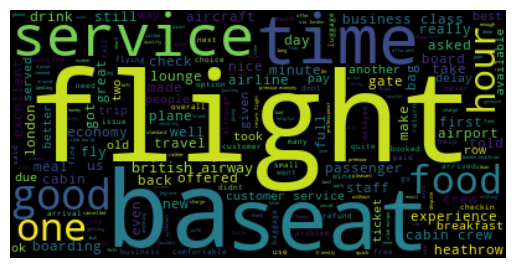

In [19]:
text = " "
for ind in df1.index:
    if df1['tag'][ind] == "Positive":
        text = text + df1['reviews'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

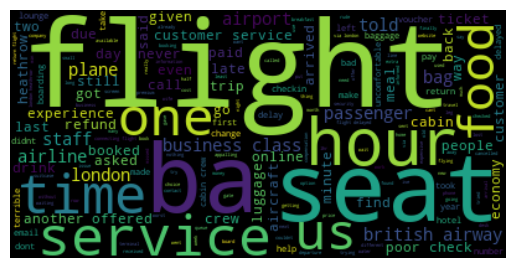

In [20]:
text2= " "        
for ind in df1.index:
    if df1['tag'][ind] == "Negative":
        text2 = text2 + df1['reviews'][ind]  
wordcloud_negative = WordCloud().generate(text2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

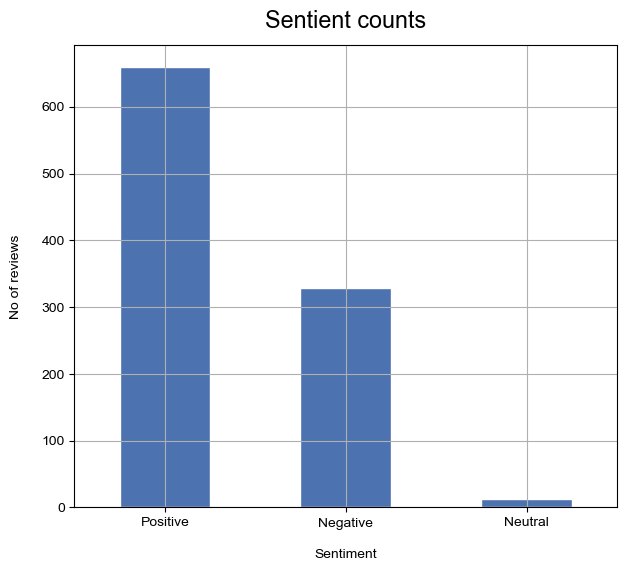

In [21]:
df1['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df1['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("No of reviews", labelpad=14)
plt.title("Sentient counts", y=1.02);